#### Importing required libraries


In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

##### Audio files are located at: https://drive.google.com/drive/folders/1q8FdT_WDfWSl0JUiuzXnWvrdrGpj353i?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Data visualisation

In [ ]:
example_file='/content/drive/MyDrive/dataset/Angel/1.wav'

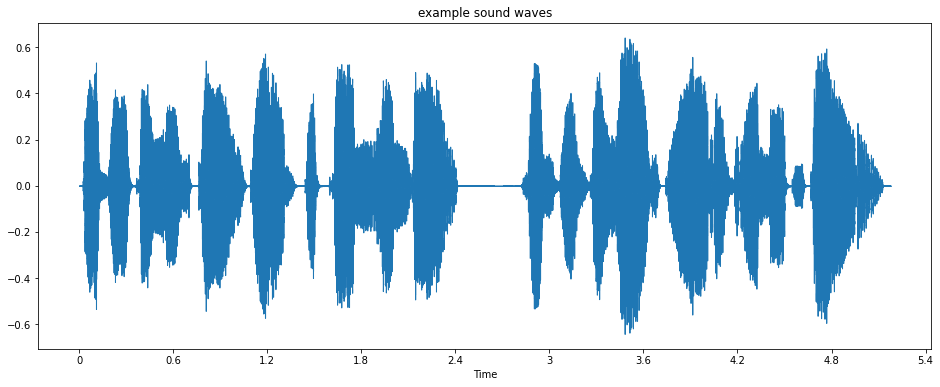

In [ ]:
def get_sound_waves(file):
  y, s = librosa.load(file)
  audio, _ = librosa.effects.trim(y)
  pyplot.figure(figsize = (16, 6))
  librosa.display.waveshow(y = audio, sr = s)
  pyplot.title("example sound waves")

get_sound_waves(example_file)

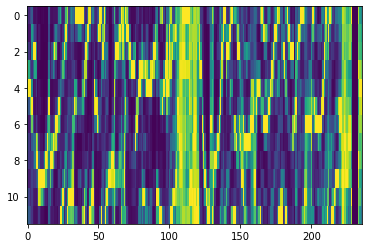

In [ ]:
def get_chroma_vector(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
  return chroma
  
chroma = get_chroma_vector(example_file)
pyplot.imshow(chroma, interpolation='nearest', aspect='auto')
pyplot.show()

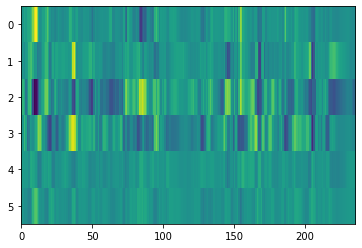

In [ ]:
def get_tonnetz(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  tonnetz = np.array(librosa.feature.tonnetz(y=y, sr=sr))
  return tonnetz

tntz = get_tonnetz(example_file)
pyplot.imshow(tntz , interpolation='nearest', aspect='auto')
pyplot.show()

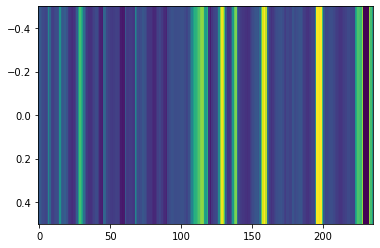

In [ ]:
def get_spectral_centroid(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  spectral_centroid = np.array(librosa.feature.spectral_centroid(y=y, sr=sr))
  return spectral_centroid

sc = get_spectral_centroid(example_file)
pyplot.imshow(sc , interpolation='nearest', aspect='auto')
pyplot.show()

#### Extracting features from audio file

In [ ]:
def get_mfcc(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=10)
  mfcc = np.array(librosa.feature.mfcc(y=y, sr=sr,n_mfcc=20))
  mfcc_mean_var=[]
  for i in range(mfcc.shape[0]):
    mfcc_mean_var.append(mfcc[i].mean())
    mfcc_mean_var.append(mfcc[i].var())
  return np.array(mfcc_mean_var)

In [ ]:
def get_feature(file_path,label):
  # Extracting MFCC feature
  y, sr = librosa.load(file_path, offset=0, duration=10)

  mfcc_feature = get_mfcc(file_path)
  # print('mfcc',mfcc_feature.shape)

  # Extracting chroma vector feature
  chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
  chroma_feature=np.array([chroma.mean(), chroma.var()])
  # print('chroma',chroma_feature.shape)

  # Extracting tonnetz feature  
  tntz = np.array(librosa.feature.tonnetz(y=y, sr=sr))
  tntz_feature = np.array([tntz.mean(), tntz.var()]) 
  # print('ton',tntz_feature.shape)
  
  zero_cross = librosa.zero_crossings(y, pad=False)
  zero_crossing_rate_feature = np.array([zero_cross.mean(),zero_cross.var()])
  # print('zero',zero_crossing_rate_feature.shape)
  
  sc = librosa.feature.spectral_centroid(y=y, sr=sr)
  spectral_centroid = np.array([sc.mean(),sc.var()])
  # print('sc',spectral_centroid.shape)

  sb = librosa.feature.spectral_bandwidth(y=y, sr=sr)
  spectral_bandwidth = np.array([sb.mean(),sb.var()])
  # print('sb',spectral_bandwidth.shape)

  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
  rolloff = np.array([rolloff.mean(),rolloff.var()])
  # print('rolloff',rolloff.shape)

  rms = librosa.feature.rms(y=y)
  rms = np.array([rms.mean(),rms.var()])
  # print('rms',rms.shape)
  label=np.array([label])
  
  tempo, _ = librosa.beat.beat_track(y, sr = sr)
  tempo=np.array([tempo])
  
  feature = np.concatenate( (mfcc_feature, chroma_feature, zero_crossing_rate_feature, tntz_feature, spectral_centroid, spectral_bandwidth, rolloff, rms, tempo, label) )
  # print(feature.shape)

  return feature

#### Preparing dataset

In [ ]:
k=0
df=pd.DataFrame(columns=['mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var','mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var','chroma_mean','chroma_var','zcr_mean','zcr_var','tonnetz_mean','tonnetz_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','rms_mean','rms_var','tempo','label'])
for label in ['Mia','Kevin','Angel','Justin','Elizabeth','Bernard','Rishi']:
  for i in range(7):
    df.loc[k]=get_feature(f'/content/drive/MyDrive/dataset/{label}/{i+1}.wav',label=label)
    k+=1
df

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=932
  n_fft, y.shape[-1]


,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,...,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,rms_mean,rms_var,tempo,label
0,-265.46454,12629.149,78.75655,5443.1826,20.745378,999.511,13.864583,603.2955,7.989238,304.20886,...,2573.3553618558426,4016004.7066663494,2217.939004892704,351706.5539392846,4349.9462890625,9194915.281867981,0.1069364,0.0041257064,117.45383522727273,Mia
1,-272.8254,9789.276,82.356514,4608.9736,29.47835,806.7714,14.9413,807.4863,7.484646,362.9439,...,2355.32369391189,3806210.0468701664,2197.921216656567,385919.87831868033,4070.6111542166095,9362853.798646154,0.1086917,0.004867917,151.99908088235293,Mia
2,-264.61298,10206.229,88.21726,4262.425,20.849533,976.81085,12.186366,656.65857,10.067146,318.39282,...,2281.8697858262626,3626350.381483014,2174.3058301765905,302607.17055164254,3887.2615559895835,7765628.919867013,0.1065369,0.00357357,103.359375,Mia
3,-273.12753,15669.975,78.80006,4326.3584,15.430136,1162.0332,11.42814,804.72876,6.5428443,339.9811,...,2440.9228060184682,3560548.252701665,2212.275006475875,384036.1782786014,4275.56486550174,8445698.460391562,0.10024932,0.004254483,69.83741554054055,Mia
4,-253.83377,10481.875,71.02393,4854.4336,24.68269,1136.7169,15.91541,684.7386,8.860317,330.1248,...,2698.8767805370057,4569821.951869565,2254.866537068293,345081.58408624446,4513.209143350291,9551252.247038374,0.11468249,0.0045877052,172.265625,Mia
5,-266.4216,11894.857,79.624176,4907.2954,16.42801,938.0184,11.015837,720.3937,6.8101707,418.47726,...,2401.518702791217,3517625.4011372393,2244.7406595992425,391423.4862133772,4257.96825102646,8642618.870118512,0.10856484,0.0050702747,135.99917763157896,Mia
6,-273.8077,13216.457,69.34729,4944.6,17.70632,1080.8197,13.625312,761.4186,6.2849855,293.52628,...,2648.069122194613,4132139.928835786,2233.1659482167693,417215.7699181242,4510.096932415986,9419414.441956243,0.098863035,0.0047438503,103.359375,Mia
7,-323.03897,12080.335,77.5297,4886.252,-14.764951,1024.4753,11.954634,585.04126,-14.859528,564.2677,...,2237.1483455941147,2622534.8444127715,1959.6352165122098,475695.5134770359,4038.498112342877,6925031.37324954,0.055969995,0.0010253695,184.5703125,Kevin
8,-331.28455,13105.118,73.72718,3635.3728,-11.649012,1207.0299,11.674972,791.80884,-19.152822,892.3734,...,2266.72299388436,2483313.4601434893,2044.7050040027348,391214.379398441,4050.4679753230166,6741223.810696574,0.050418224,0.0010988504,184.5703125,Kevin
9,-313.49658,10030.372,71.953156,3878.8718,-0.52251256,1521.7233,15.216091,882.02374,-6.993149,487.79434,...,2403.521714434732,3152904.2233898113,2187.621876822745,465172.4097484698,4266.334885817308,8277923.834366207,0.062015276,0.0008420256,112.34714673913044,Kevin


In [ ]:
df = df.sample(frac = 1,random_state=30)

In [ ]:
X=df.drop(['label'],axis=1)
y=df['label']

In [ ]:
for col in X.columns:
  X[col]=X[col].astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 40 to 37
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mfcc1_mean               49 non-null     float64
 1   mfcc1_var                49 non-null     float64
 2   mfcc2_mean               49 non-null     float64
 3   mfcc2_var                49 non-null     float64
 4   mfcc3_mean               49 non-null     float64
 5   mfcc3_var                49 non-null     float64
 6   mfcc4_mean               49 non-null     float64
 7   mfcc4_var                49 non-null     float64
 8   mfcc5_mean               49 non-null     float64
 9   mfcc5_var                49 non-null     float64
 10  mfcc6_mean               49 non-null     float64
 11  mfcc6_var                49 non-null     float64
 12  mfcc7_mean               49 non-null     float64
 13  mfcc7_var                49 non-null     float64
 14  mfcc8_mean               49

#### Preprocessing

In [ ]:
X=(X-X.min())/(X.max()-X.min())
X.describe()

,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,...,tonnetz_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,rms_mean,rms_var,tempo
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.660203,0.527067,0.483709,0.481938,0.379315,0.366999,0.507001,0.491583,0.539070,0.384374,...,0.379295,0.410929,0.461374,0.611468,0.420525,0.447452,0.479453,0.421332,0.413593,0.431829
std,0.263073,0.281089,0.245719,0.260784,0.250098,0.225283,0.208282,0.229511,0.331665,0.219495,...,0.293990,0.236578,0.263783,0.286227,0.285804,0.254006,0.251976,0.260440,0.286555,0.248704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.641205,0.296444,0.308936,0.298911,0.192140,0.221946,0.346606,0.351792,0.221230,0.251094,...,0.107958,0.200997,0.243848,0.365109,0.229362,0.281915,0.275471,0.158757,0.102860,0.225443
50%,0.734817,0.571720,0.441025,0.421173,0.291928,0.313125,0.482176,0.475940,0.723007,0.404288,...,0.370848,0.432935,0.452537,0.637417,0.373127,0.474929,0.511706,0.385387,0.433660,0.370510
75%,0.818257,0.746686,0.670102,0.683892,0.530224,0.528083,0.680467,0.624213,0.811692,0.504733,...,0.569457,0.543169,0.655134,0.846023,0.594276,0.592375,0.671226,0.594001,0.607976,0.576659
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Model evaluation

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=100,max_leaf_nodes=100)
cv=KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=cv)
print(np.mean(scores)*100)

83.99999999999999


In [ ]:
model=KNeighborsClassifier(n_neighbors=10)
cv=KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=cv)
print(np.mean(scores)*100)

74.8888888888889


In [ ]:
model=RandomForestClassifier(n_estimators=5, max_depth=5)
scores = cross_val_score(model, X, y, cv=5)
print(np.mean(scores)*100)

96.0


##### Random Forest Classifier has the highest accuracy on average

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

In [ ]:
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(confusion_matrix(y_test, preds))
print('Accuracy:', round(accuracy_score(y_test, preds), 5), '\n')
print(classification_report(y_test,preds))

[[2 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 1 0]]
Accuracy: 0.93333 

              precision    recall  f1-score   support

       Angel       1.00      1.00      1.00         2
   Elizabeth       1.00      1.00      1.00         3
      Justin       1.00      1.00      1.00         3
       Kevin       1.00      1.00      1.00         3
         Mia       0.75      1.00      0.86         3
       Rishi       0.00      0.00      0.00         1

    accuracy                           0.93        15
   macro avg       0.79      0.83      0.81        15
weighted avg       0.88      0.93      0.90        15



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Actual speaker for audio vs predicted:')
for i in range(len(y_test)):
  print(y_test.iloc[i],preds[i])

Actual speaker for audio vs predicted:
Kevin Kevin
Elizabeth Elizabeth
Elizabeth Elizabeth
Mia Mia
Mia Mia
Rishi Mia
Angel Angel
Justin Justin
Justin Justin
Angel Angel
Kevin Kevin
Elizabeth Elizabeth
Kevin Kevin
Mia Mia
Justin Justin


Feature Importances:
Feature: mfcc1_var, Score: 0.033511293634496925
Feature: mfcc2_var, Score: 0.016929460580912867
Feature: mfcc3_var, Score: 0.1200853500927924
Feature: mfcc4_mean, Score: 0.03402844322762186
Feature: mfcc6_mean, Score: 0.07444898588389857
Feature: mfcc8_mean, Score: 0.10315266568635734
Feature: mfcc8_var, Score: 0.03550656869294144
Feature: mfcc10_mean, Score: 0.02521042084168337
Feature: mfcc11_var, Score: 0.04625322997416022
Feature: mfcc13_mean, Score: 0.04232365145228217
Feature: mfcc13_var, Score: 0.03538727524204703
Feature: mfcc14_mean, Score: 0.09414775481165522
Feature: mfcc15_var, Score: 0.035373032169746764
Feature: mfcc18_mean, Score: 0.023611111111111114
Feature: mfcc19_var, Score: 0.058653846153846174
Feature: mfcc20_mean, Score: 0.03901820735488068
Feature: chroma_var, Score: 0.0108974358974359
Feature: zcr_mean, Score: 0.01861738535249829
Feature: tonnetz_mean, Score: 0.06059581982412795
Feature: tonnetz_var, Score: 0.05391120507399578
Feature: rollo

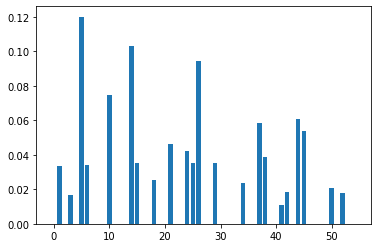

In [ ]:
print('Feature Importances:')
importance = model.feature_importances_
for i,v in enumerate(importance):
  if v>0:
    print(f'Feature: {df.columns[i]}, Score: {v}')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Feature selection

In [ ]:
eig_vectors,eig_values,v = np.linalg.svd(X.corr())

In [ ]:
indices = np.argsort(eig_values)[::-1]
sorted_eigenvalues  = eig_values[indices]
sorted_eigenvectors = eig_vectors[:,indices]

In [ ]:
explained_variance=(eig_values.astype(float)/ np.sum(eig_values))*100
print('Precentage variance of features:',explained_variance)

Precentage variance of features: [2.82638832e+01 1.84013369e+01 1.40691838e+01 9.47075666e+00
 6.59781965e+00 4.74737982e+00 2.50635906e+00 2.04524597e+00
 1.69087357e+00 1.60641833e+00 1.27474049e+00 1.18927852e+00
 1.10742248e+00 9.47310365e-01 7.84388006e-01 7.03705015e-01
 5.65666130e-01 5.46010955e-01 4.80092028e-01 4.15528737e-01
 3.80613811e-01 3.27094877e-01 2.45540423e-01 2.23712985e-01
 1.97891738e-01 1.76871531e-01 1.45323306e-01 1.34423220e-01
 1.27052021e-01 1.00997844e-01 9.45709315e-02 8.59549937e-02
 7.25519916e-02 5.48340100e-02 5.35072540e-02 3.90504564e-02
 3.23430111e-02 2.41077484e-02 1.69060009e-02 1.36725542e-02
 1.14978875e-02 9.11013868e-03 7.36141058e-03 4.52529390e-03
 3.48506901e-03 1.71263759e-03 1.48345427e-03 4.03752966e-04
 1.01355069e-14 1.88323152e-15 1.88323152e-15 1.88323152e-15
 1.88323152e-15 1.88323152e-15 1.88323152e-15]


In [ ]:
sum=0
feature_count=0
for var in explained_variance:
  sum+=var
  if sum>=95:
    break
  feature_count+=1

In [ ]:
X_pca = np.dot(sorted_eigenvectors[:,0:feature_count].transpose(),X.transpose()).transpose()

In [ ]:
print(X_pca.shape)

(49, 15)


In [ ]:
model=RandomForestClassifier(n_estimators=5, max_depth=5)
cv=KFold(n_splits=5)
scores = cross_val_score(model, X_pca, y, cv=cv)
print(np.mean(scores)*100)

88.00000000000001


#### Testing on Audio 

In [ ]:
test_file='/content/drive/MyDrive/dataset/test.wav'
test=pd.DataFrame(columns=df.columns)
test.loc[0]=get_feature(test_file,label="test")

In [ ]:
test=test.drop(['label'],axis=1)

In [ ]:
for col in test.columns:
  test[col]=test[col].astype(float)

In [ ]:
print(test)

   mfcc1_mean  mfcc1_var  mfcc2_mean  mfcc2_var  mfcc3_mean  mfcc3_var  \
0  -256.17422   5145.081    59.99739   4686.216   -5.547826  1597.7231   

   mfcc4_mean  mfcc4_var  mfcc5_mean  mfcc5_var  ...  tonnetz_var  \
0   11.117105   960.1896  -18.515469   426.2689  ...     0.018666   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             2980.630767           3.360539e+06              2291.496529   

   spectral_bandwidth_var  rolloff_mean   rolloff_var  rms_mean   rms_var  \
0           305148.934948   5312.423365  6.535159e+06  0.058754  0.001163   

        tempo  
0  123.046875  

[1 rows x 55 columns]


In [ ]:
model.fit(X, y)
predict = model.predict(test)
print(predict)

['Justin']
